# 各種データの収集
- 対象国=G7
  - Canada
  - France
  - Germany
  - Italy
  - Japan
  - United Kingdom
  - United States
- 対象データ
  - 人口推移
    - ex: CAN_LP-canada-population-millions
          CAN_LP.csv
    - FRA_LP-france-population-millions
    - DEU_LP-germany-population-millions
    - ITA_LP-italy-population-millions
    - JPN_LP-japan-population-millions
    - GBR_LP-united-kingdom-population-millions
    - USA_LP-united-states-population-millions
  - GDP
    - ex: CAN_NGDP_R-canada-gdp-at-constant-prices-lcu-billions
          CAN_NGDP_R.csv
  - インフレ率
    - ex: JPN_PCPIPCH-japan-inflation-change-average-consumer-prices
          JPN_PCPIPCH.csv
  - 輸出入
    - ex: JPN_TX_RPCH-japan-exports-of-goods-and-services-change
          JPN_TX_RPCH.csv
    - ex: JPN_TM_RPCH-japan-imports-of-goods-and-services-change
          JPN_TM_RPCH.csv
- API Key
  - api_key=

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

COUNTRIES = {
    "Canada": "CAN",
    "France": "FRA",
    "Germany": "DEU",
    "Italy": "ITA",
    "Japan": "JPN",
    "United Kingdom": "GBR",
    "United States": "USA",
}
colors = ["r", "b", "g", "k", "m", "y", "k"]
df_population = pd.DataFrame()
df_gdp = pd.DataFrame()
df_inflation = pd.DataFrame()
df_import = pd.DataFrame()
df_export = pd.DataFrame()

api_key = "LQg7ajNfaVt_1_e-fpxN"

for key, value in COUNTRIES.items():
    df_p = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_LP.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_g = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_NGDP_R.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_i = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_PCPIPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_imp = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_TM_RPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_exp = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_TX_RPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)

    df_p   = df_p.rename(columns={'Value': value})
    df_g   = df_g.rename(columns={'Value': value})
    df_i   = df_i.rename(columns={'Value': value})
    df_imp = df_imp.rename(columns={'Value': value})
    df_exp = df_exp.rename(columns={'Value': value})
    if df_population.columns.size < 1:
        df_population = df_p.copy()
        df_gdp        = df_g.copy()
        df_inflation  = df_i.copy()
        df_import     = df_imp.copy()
        df_export     = df_exp.copy()
    else: 
        df_population = df_population.merge(df_p, on="Date", how="left")
        df_gdp        = df_gdp.merge(df_g, on="Date", how="left")
        df_inflation  = df_inflation.merge(df_i, on="Date", how="left")
        df_import     = df_import.merge(df_imp, on="Date", how="left")
        df_export     = df_export.merge(df_exp, on="Date", how="left")

df_population = df_population.sort_values(by="Date")
df_gdp        = df_gdp.sort_values(by="Date")
df_inflation  = df_inflation.sort_values(by="Date")
df_import     = df_inflation.sort_values(by="Date")
df_export     = df_inflation.sort_values(by="Date")


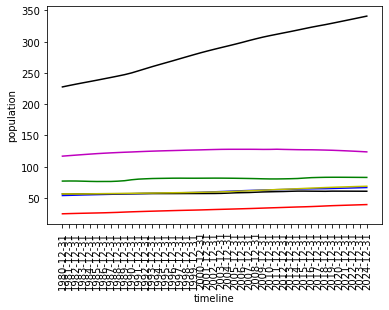

In [112]:
for key, value, color in zip(COUNTRIES.keys(), COUNTRIES.values(), colors):
    plt.plot(df_population["Date"], df_population[value], c=color, label=key)
plt.xlabel("timeline")
plt.ylabel("population")
plt.xticks(df_population["Date"], rotation=90)
plt.show()
